In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mne.io as io_eeg
from scipy.signal.windows import *

#we are going to read an example eeg which is in the folder EEG_example. The method returns a RAW men object
filename = 'Neuromarketing3850.vhdr'
eeg_object = io_eeg.read_raw_brainvision(filename,preload = True) #the remaining parameters are left as default

Extracting parameters from Neuromarketing3850.vhdr...
Setting channel info structure...
Reading 0 ... 240139  =      0.000 ...   480.278 secs...


In [2]:
## 1. Print the electrodes' names.
for i in eeg_object.ch_names: 
    print(i)

## 2. Store both EEG signals and times vector on different variables, and compute the sampling rate (fs).
eeg = eeg_object.get_data()
t = eeg_object.times
fs = 500

print('EEG matrix shape: ', eeg.shape)
print('Times vector shape: ', t.shape)
print('Sampling rate (fs): %d Hz' %fs)

Fp1
Fz
F3
F7
FT9
FC5
FC1
C3
T7
TP9
CP5
CP1
Pz
P3
P7
O1
Oz
O2
P4
P8
TP10
CP6
CP2
C4
T8
FT10
FC6
FC2
F4
F8
Fp2
EEG matrix shape:  (31, 240140)
Times vector shape:  (240140,)
Sampling rate (fs): 500 Hz


In [3]:
## 3, 4 and 5. Different plots.
import matplotlib.pyplot as plt

from scipy import signal

## 1. Perform detrend (it is possible to perform this detrend on the whole signal with just one command).
eeg_detrended = signal.detrend(eeg)


## 2. Design and apply a notch filter.
f0 = 50     # Frequency to be removed from the signal (Hz)
Q = 30.0    # Quality factor

b_notch, a_notch = signal.iirnotch(f0,Q,fs=fs)   # Create notch filter
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_detrended)   # Apply filter



## 3. Design and apply a FIR bandpass filter.
f_low = 0.5        # Low cutoff frequency
f_high = 40        # High cutoff frequency
numtaps = 64       # Filter length

b_bp= signal.firwin(numtaps,[f_low, f_high],pass_zero=False,fs=fs)     # Create FIR bandpass filter

eeg_dt_bandpass = signal.filtfilt(b_bp,1,eeg_detrended)    # Apply filter (detrended signals)
eeg_nt_bandpass = signal.filtfilt(b_bp,1,eeg_notch)        # Apply filter (notch-filtered signals)
eeg_orig_bandpass = signal.filtfilt(b_bp,1,eeg)             # Apply filter (original signals)

# 128

Text(0, 0.5, '$x_1[n]$')

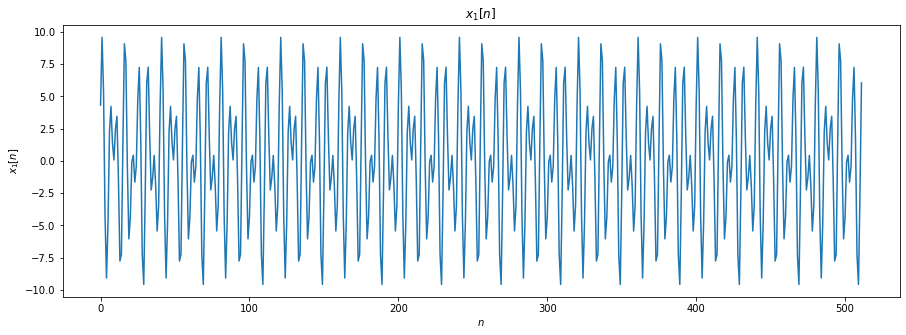

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import *

def periodogram(x,Nfft):
    
    N = len(x)
    x_f = fft(x,Nfft) 
    Px = (np.abs(x_f)**2) / N
    Px = fftshift(Px)
    f = fftshift(fftfreq(Nfft))
    return Px, f
    

## Exercise 3 A)
A1, A2, omega1, omega2 = 5, 5, 0.4*np.pi, 0.25*np.pi     # Define the parameters of the signal
phi1 = 0
phi2 = np.pi/3

L = 512    # Length of the signal
n_L = np.arange(0, L)
nfft = 1024

x1 = A1*np.sin(n_L*omega1 + phi1) + A2*np.sin(n_L*omega2 + phi2)    # Compute the signal
P_x1, f_x1 = periodogram(x1, nfft)     # Compute the periodogram

plt.figure(figsize=[15,5])
#plt.subplot(131)
plt.plot(n_L, x1)
plt.title('$x_1[n]$')
plt.xlabel('$n$')
plt.ylabel('$x_1[n]$')

Text(0, 0.5, 'Magnitude (dB)')

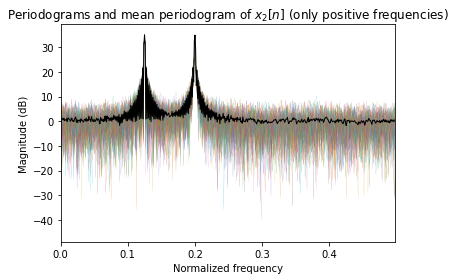

In [5]:
## Exercise 3 B)
PSD_x2 = []
x2_signals = []
Nsim = 50

for n in range(Nsim):
    phi1 = 2*np.pi*np.random.randn(1)
    phi2 = 2*np.pi*np.random.randn(1)
    v_n = np.random.randn(L)
    x2 = A1*np.sin(omega1*n_L + phi1) + A2*np.sin(omega2*n_L + phi2) + v_n   # Compute the signal
    x2_signals.append(x2)
    
    P_x2, f_x2 = periodogram(x2,nfft)     # Compute the periodogram of x2
    PSD_x2.append(P_x2)   # Add P_x2 to the PSD_x2 list

PSD_x2 = np.array(PSD_x2)     # Convert PSD_x2 list to a Numpy array.
plt.figure()
plt.plot(f_x2,10*np.log10(PSD_x2).T,linewidth = 0.1)    # Plot each periodogram of PSD_x2
plt.plot(f_x2,10*np.log10(np.mean(PSD_x2,axis=0)),'k',linewidth = 1)     # Plot the mean periodogram of PSD_x2
plt.xlim((0,f_x2[-1]))
plt.title('Periodograms and mean periodogram of $x_2[n]$ (only positive frequencies)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

Text(0, 0.5, 'Magnitude (dB)')

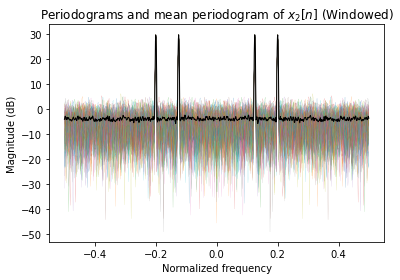

In [6]:
from scipy.signal.windows import *

x2_signals = []
Nsim = 50

for n in range(Nsim):
    phi1 = 2*np.pi*np.random.randn(1)
    phi2 = 2*np.pi*np.random.randn(1)
    v_n = np.random.randn(L)
    x2 = A1*np.sin(omega1*n_L + phi1) + A2*np.sin(omega2*n_L + phi2) + v_n   # Compute the signal
    x2_signals.append(x2)

t = np.arange(L)
w = get_window('hamming', L) # Create the window using scipy.signal.windows

PSD = []          # Same approach as in 3 B)

for x_sig in x2_signals:
    x = x_sig*w    # Perform windowing
    Px_window,f_window = periodogram(x, nfft)   # Compute the periodogram of x
    PSD.append(Px_window)  # Add Px_window to the PSD_x2 list
    
PSD = np.array(PSD)     # Convert PSD list to a Numpy array.

plt.figure()    # Same plots as in 3 B)
plt.plot(f_x2, 10*np.log10(PSD).T,linewidth = 0.1)
plt.plot(f_x2, 10*np.log10(np.mean(PSD,axis=0)),'k',linewidth = 1)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Windowed)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

Text(0, 0.5, 'Magnitude (dB)')

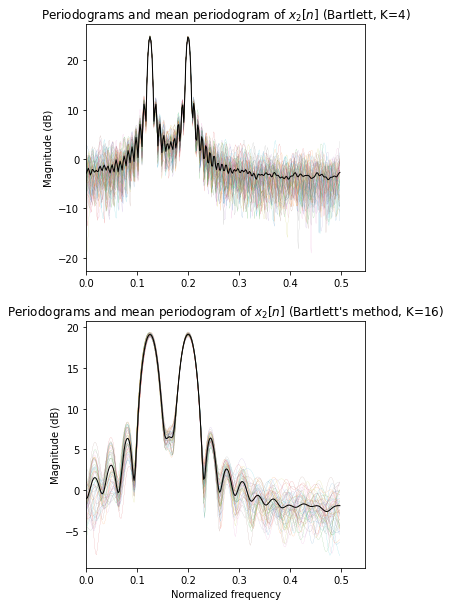

In [7]:
def bart(x,K,nfft):
    """
    Función que implementa el periodograma de Bartlett
    """    
    x = np.array(x)
    N = len(x)
    NFFT = N
    L = int(np.floor(N/K))   
    Sx = []    
    for i in range(0,int(L*K),L):       
        x_aux = x[i:i+L]
        sx_aux,f = periodogram(x_aux,NFFT)       
        Sx.append(sx_aux)
        
    Sx = np.array(Sx)    
    Sx = np.mean(Sx,axis = 0)    
    return Sx,f

## Exercise 3 E)
K = 4
K2 = 16
w = get_window('hamming',L) # Create the window using scipy.signal.windows

PSD4 = []     # Same approach as in 3 B)
PSD16 = []

for x_sig in x2_signals:
    x = x_sig*w    # Perform windowing
    Px_bart4, f_bart4 = bart(x,4,nfft)    # Apply Bartlett's method (K=4)
    Px_bart16, f_bart16 = bart(x,16,nfft) # Apply Bartlett's method (K=16)

    PSD4.append(Px_bart4)
    PSD16.append(Px_bart16)


PSD4 = np.array(PSD4)     # Convert PSD4 list to a Numpy array.
PSD16 = np.array(PSD16)   # Convert PSD16 list to a Numpy array.

plt.figure(figsize=[5,10])   # Same plots as in 3 B)  (K=4)
plt.subplot(211)

plt.plot(f_bart4,10*np.log10(PSD4).T,linewidth = 0.1)
plt.plot(f_bart4,10*np.log10(np.mean(PSD4,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Bartlett, K=4)')
plt.ylabel('Magnitude (dB)')

plt.subplot(212)    # Same plots as in 3 B)  (K=16)
plt.plot(f_bart16, 10*np.log10(PSD16).T,linewidth = 0.1)
plt.plot(f_bart16,10*np.log10(np.mean(PSD16,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Bartlett\'s method, K=16)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

Text(0, 0.5, 'Magnitude (dB)')

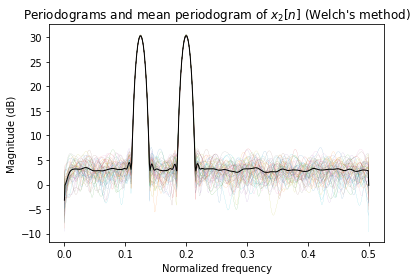

In [8]:
## Exercise 3 F)
from scipy import signal
PSD_welch = []   # Same approach as in 3 B)

for x_sig in x2_signals:
    f_welch, Pxx_welch = signal.welch(x_sig,window ='hanning',nperseg = 128 ,nfft = 1024)   # Compute the Welch's periodogram
    PSD_welch.append(Pxx_welch)    

PSD_welch = np.array(PSD_welch)    # Convert PSD_welch list to a Numpy array.

plt.figure()   # Same plots as in 3 B)
plt.plot(f_welch,10*np.log10(PSD_welch).T,linewidth = 0.1)
plt.plot(f_welch,10*np.log10(np.mean(PSD_welch,axis=0)),'k',linewidth = 1)
#plt.xlim(0,50)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Welch\'s method)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

Text(0, 0.5, 'Magnitude (dB)')

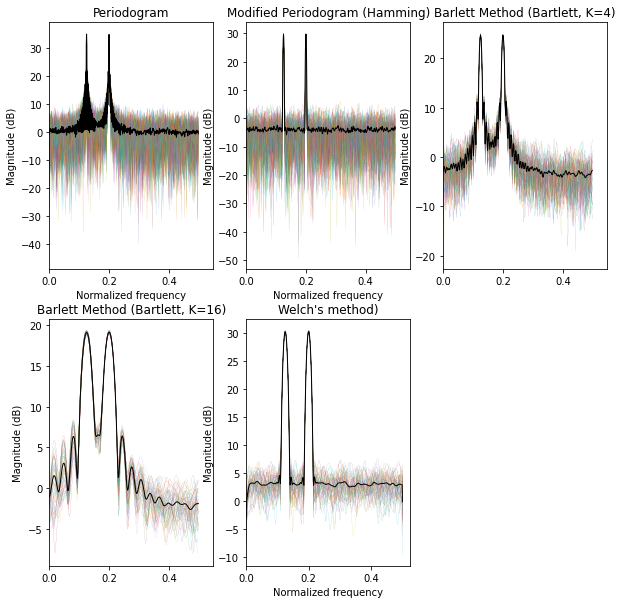

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import *

plt.figure(figsize = [10,10])   

plt.subplot(2,3,1)
plt.plot(f_x2, 10*np.log10(PSD_x2).T,linewidth = 0.1)
plt.plot(f_x2, 10*np.log10(np.mean(PSD_x2,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Periodogram')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

plt.subplot(2,3,2)
plt.plot(f_x2, 10*np.log10(PSD).T,linewidth = 0.1)
plt.plot(f_x2, 10*np.log10(np.mean(PSD,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Modified Periodogram (Hamming)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

plt.subplot(2,3,3)
plt.plot(f_bart4,10*np.log10(PSD4).T,linewidth = 0.1)
plt.plot(f_bart4,10*np.log10(np.mean(PSD4,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Barlett Method (Bartlett, K=4)')
plt.ylabel('Magnitude (dB)')

plt.subplot(2,3,4)
plt.plot(f_bart16,10*np.log10(PSD16).T,linewidth = 0.1)
plt.plot(f_bart16,10*np.log10(np.mean(PSD16,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Barlett Method (Bartlett, K=16)')
plt.ylabel('Magnitude (dB)')

plt.subplot(2,3,5)
plt.plot(f_welch,10*np.log10(PSD_welch).T,linewidth = 0.1)
plt.plot(f_welch,10*np.log10(np.mean(PSD_welch,axis=0)),'k',linewidth = 1)
plt.xlim(0,)
plt.title('Welch\'s method)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')